In [312]:
import pandas as pd
import geopandas as gpd
import importlib
import numpy as np
import matplotlib.pyplot as plt

from diagnostic import analyses#, simulparser


In [313]:
importlib.reload(latex_string)
importlib.reload(analyses)

<module 'diagnostic.analyses' from '/home/ebobrow/Github/simul_diagnostic/src/diagnostic/analyses.py'>

In [314]:
matsim_output_path = ''
loop_detector_counts = ''

In [315]:
if matsim_output_path and loop_detector_counts:
    simulated = simulparser.MATSimParser(matsim_output_path)
    observed = pd.read_csv(loop_detector_counts)
else:
    simulated = pd.DataFrame.from_dict({
        'link_id' : [i for i in range(0, 10)],
        'count' : [i for i in range(10, 101, 10)]
    })
    observed = pd.DataFrame.from_dict({
        'link_id' : [i for i in range(0, 10)],
        'count' : [i for i in range(11, 102, 10)]
    })
    # simulated = pd.read_csv('./test_data/simulated.csv')
    # observed = pd.read_csv('./test_data/observed.csv')

In [316]:
zurich_shp = gpd.read_file("test_data/zurich_shp/geoz.sv_str_lin.shp")
zurich_shp.head()

,str_nr,str_name,str_st_bez,str_von,str_bis,str_kreis,str_planqu,str_vb,str_up_kan,snb_str_nr,snb_erlaeu,snb_tafelt,snb_tafe00,objectid,geometry
0,1771,Schoeckstrasse,gültig,Utoquai,Theaterstrasse 14,1,O 14,AA,2408,1771.0,Othmar Schoeck (1886-1957): Komponist und Musi...,NaN,NaN,5968.0,"LINESTRING (2683569.818 1246755.725, 2683586.3..."
1,53,Altweg,gültig,Letzigraben 231,In der Ey 60,9,J 13,AR,2406,53.0,Verkürzte Form des Flurnamens «im alten Weg» (...,NaN,NaN,5969.0,"LINESTRING (2679645.779 1247242.273, 2679618.3..."
2,223,Binderweg,gültig,Zelghalde 44,Hürststrasse 56,11,M 8,AF,2107,223.0,Gottfried Binder (1872-1934): Letzter Gemeinde...,NaN,NaN,5970.0,"LINESTRING (2682314.741 1252068.947, 2682312.7..."
3,1754,Schlatterweg,gültig,Schaffhauserstrasse 91,Im Birkenhof,6,N 10,UN,2207,1754.0,Leonhard Schlatter: Erster namentlich bekannte...,Leonhard Schlatter\r\nErster namentlich bekann...,NaN,5971.0,"LINESTRING (2683097.981 1249831.463, 2683059.2..."
4,2223,Wunderlistrasse,gültig,Lehenstrasse 43,Rebbergstrasse 1,10,L/M 10,WP,2207,2223.0,Paul Wunderli (1852-1885): Kaufmann von Meilen...,Paul Wunderli (1852-1885)\r\nEigentümer des Wa...,NaN,5972.0,"LINESTRING (2681928.804 1250113.515, 2681929.5..."


In [317]:
zurich_shp = zurich_shp[["str_nr", "geometry"]]#[zurich_shp["str_nr"] < 100]
zurich_shp.head()

,str_nr,geometry
0,1771,"LINESTRING (2683569.818 1246755.725, 2683586.3..."
1,53,"LINESTRING (2679645.779 1247242.273, 2679618.3..."
2,223,"LINESTRING (2682314.741 1252068.947, 2682312.7..."
3,1754,"LINESTRING (2683097.981 1249831.463, 2683059.2..."
4,2223,"LINESTRING (2681928.804 1250113.515, 2681929.5..."


In [318]:
zurich_shp.rename(columns={"str_nr" : "link_id"}, inplace=True)
zurich_shp["count"] = np.arange(len(zurich_shp))
zurich_shp.sort_values(by="link_id", axis=0)

,link_id,geometry,count
2343,1,"LINESTRING (2680342.974 1249622.810, 2680313.4...",2343
1343,2,"LINESTRING (2682744.049 1249785.661, 2682692.9...",1343
1333,3,"LINESTRING (2682439.479 1244881.638, 2682420.8...",1333
2394,4,"LINESTRING (2683512.517 1251292.411, 2683516.0...",2394
1015,5,"LINESTRING (2684947.593 1247872.278, 2684971.5...",1015
...,...,...,...
1314,2543,"MULTILINESTRING ((2682893.243 1247992.848, 268...",1314
2071,2544,"LINESTRING (2681298.824 1248570.722, 2681336.0...",2071
1392,2545,"LINESTRING (2681732.748 1248296.763, 2681732.9...",1392
2124,2546,"MULTILINESTRING ((2679586.345 1248309.266, 267...",2124


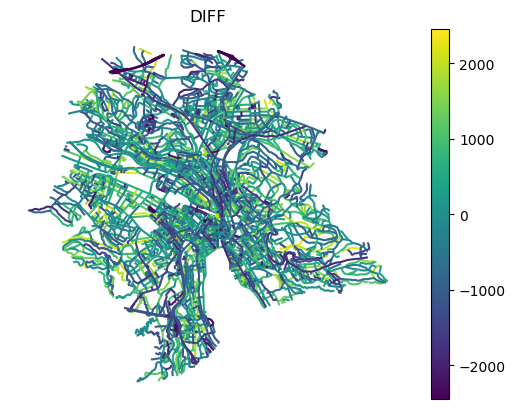

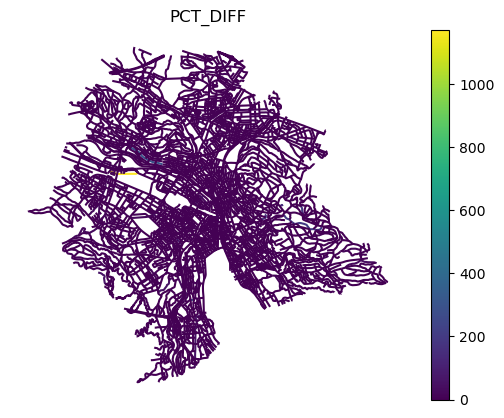

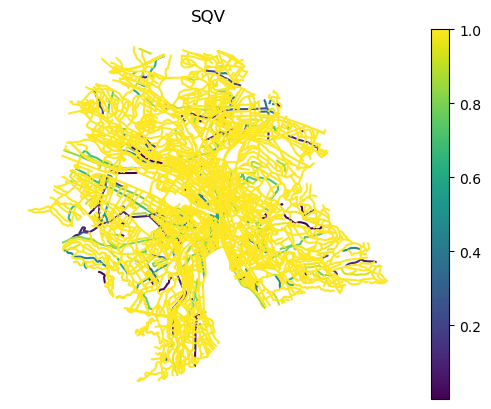

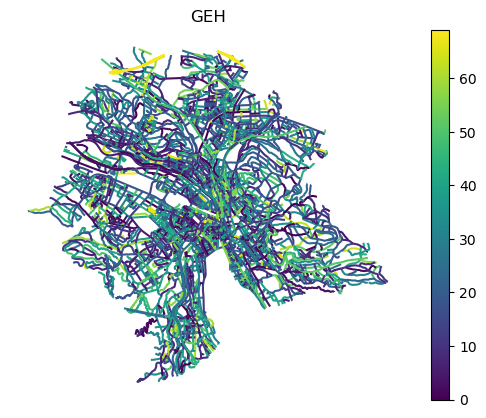

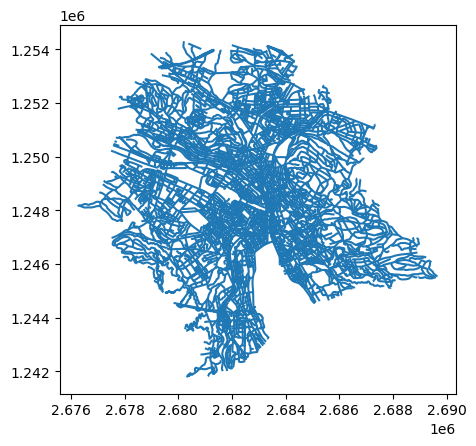

In [319]:
plt.ion()
zurich_shp.plot()
plt.ioff()

In [320]:
observed = pd.DataFrame({"count" : list(range(2, len(zurich_shp)+1)),
"link_id" : list(range(1,len(zurich_shp)))})
observed

,count,link_id
0,2,1
1,3,2
2,4,3
3,5,4
4,6,5
...,...,...
2518,2520,2519
2519,2521,2520
2520,2522,2521
2521,2523,2522


In [321]:
analyses_dict = {
    analyses.CountComparison : None,
    analyses.CountSummaryStats : None,
    analyses.CountVisualization: None
}

In [322]:
link_count_report = analyses.Report('Link count report', zurich_shp, observed, analyses_dict)

INFO:root:<class 'diagnostic.analyses.CountComparison'>
INFO:root:<enum 'CountComparisonOptions'>
INFO:root:Using standard options
/home/ebobrow/anaconda3/envs/simul/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
INFO:root:<class 'diagnostic.analyses.CountSummaryStats'>
INFO:root:<enum 'CountSummaryStatsOptions'>
INFO:root:Using standard options
INFO:root:<class 'diagnostic.analyses.CountVisualization'>
INFO:root:<enum 'CountComparisonOptions'>
INFO:root:Using standard options


                                                  geometry  count_sim  \
link_id                                                                 
1        LINESTRING (2680342.974 1249622.810, 2680313.4...     2343.0   
2        LINESTRING (2682744.049 1249785.661, 2682692.9...     1343.0   
3        LINESTRING (2682439.479 1244881.638, 2682420.8...     1333.0   
4        LINESTRING (2683512.517 1251292.411, 2683516.0...     2394.0   
5        LINESTRING (2684947.593 1247872.278, 2684971.5...     1015.0   
...                                                    ...        ...   
2519     MULTILINESTRING ((2681947.835 1243505.638, 268...      715.0   
2520     MULTILINESTRING ((2682005.213 1246959.419, 268...     1345.0   
2521     MULTILINESTRING ((2681335.749 1244275.905, 268...     1364.0   
2522     MULTILINESTRING ((2682188.149 1243020.604, 268...     1033.0   
2523     LINESTRING (2683731.192 1250461.058, 2683723.6...     1296.0   

         count_obs  
link_id             
1       

In [323]:
comparison = link_count_report.comparison

In [324]:
# link_count_report.to_latex('latex_output/test', latex_dir=PurePath(Path.cwd(), 'latex_output'))
link_count_report.to_latex('latex_output/test')

Escape chars: ['_']
Escape chars: ['_']
Paths: [PurePosixPath('/tmp/tmpumy38fpq/DIFF.pdf'), PurePosixPath('/tmp/tmpumy38fpq/PCT_DIFF.pdf'), PurePosixPath('/tmp/tmpumy38fpq/SQV.pdf'), PurePosixPath('/tmp/tmpumy38fpq/GEH.pdf')]
Data: [Figure([NoEscape(\centering), StandAloneGraphic(Arguments(NoEscape(/tmp/tmpumy38fpq/DIFF.pdf)), Options('width=\\textwidth'), None)]), Figure([NoEscape(\centering), StandAloneGraphic(Arguments(NoEscape(/tmp/tmpumy38fpq/PCT_DIFF.pdf)), Options('width=\\textwidth'), None)]), Figure([NoEscape(\centering), StandAloneGraphic(Arguments(NoEscape(/tmp/tmpumy38fpq/SQV.pdf)), Options('width=\\textwidth'), None)]), Figure([NoEscape(\centering), StandAloneGraphic(Arguments(NoEscape(/tmp/tmpumy38fpq/GEH.pdf)), Options('width=\\textwidth'), None)])]
Width: \textwidth


# Earth mover's distance test

In [401]:
from scipy.stats import wasserstein_distance

a = {(1, 2) : 5, (2, 3) : 10}
b = {(1, 2) : 3, (2, 3) : 6}
# a = [1, 2]
comparison['link_count_sim'] = pd.Series(a for x in range(len(comparison) + 1))
comparison['link_count_obs'] = pd.Series(b for x in range(len(comparison) + 1))

In [402]:
comparison

,geometry,count_sim,count_obs,DIFF,PCT_DIFF,SQV,GEH,link_count_sim,link_count_obs,wass_dist
link_id,,,,,,,,,,
1,"LINESTRING (2680342.974 1249622.810, 2680313.4...",2343.0,2,2341.0,1170.500000,0.000604,68.366758,"{(1, 2): 5, (2, 3): 10}","{(1, 2): 3, (2, 3): 6}",0.033333
2,"LINESTRING (2682744.049 1249785.661, 2682692.9...",1343.0,3,1340.0,446.666667,0.001291,51.653204,"{(1, 2): 5, (2, 3): 10}","{(1, 2): 3, (2, 3): 6}",0.033333
3,"LINESTRING (2682439.479 1244881.638, 2682420.8...",1333.0,4,1329.0,332.250000,0.001503,51.401320,"{(1, 2): 5, (2, 3): 10}","{(1, 2): 3, (2, 3): 6}",0.033333
4,"LINESTRING (2683512.517 1251292.411, 2683516.0...",2394.0,5,2389.0,477.800000,0.000935,68.978862,"{(1, 2): 5, (2, 3): 10}","{(1, 2): 3, (2, 3): 6}",0.033333
5,"LINESTRING (2684947.593 1247872.278, 2684971.5...",1015.0,6,1009.0,168.166667,0.002422,44.657385,"{(1, 2): 5, (2, 3): 10}","{(1, 2): 3, (2, 3): 6}",0.033333
...,...,...,...,...,...,...,...,...,...,...
2519,"MULTILINESTRING ((2681947.835 1243505.638, 268...",715.0,2520,-1805.0,-0.716270,0.000000,44.880229,"{(1, 2): 5, (2, 3): 10}","{(1, 2): 3, (2, 3): 6}",0.033333
2520,"MULTILINESTRING ((2682005.213 1246959.419, 268...",1345.0,2521,-1176.0,-0.466482,0.000000,26.748005,"{(1, 2): 5, (2, 3): 10}","{(1, 2): 3, (2, 3): 6}",0.033333
2521,"MULTILINESTRING ((2681335.749 1244275.905, 268...",1364.0,2522,-1158.0,-0.459159,0.000000,26.270731,"{(1, 2): 5, (2, 3): 10}","{(1, 2): 3, (2, 3): 6}",0.033333


In [403]:
def integral(row, col):
        return sum(((key[1] - key[0]) * count for (key, count) in row[col].items()))
        pass

def vector_wasser(row):
    return wasserstein_distance(
        u_values=[(start + end)/2 for start, end in row['link_count_sim'].keys()],
        v_values=[(start + end)/2 for start, end in row['link_count_obs'].keys()],
        u_weights=[count/integral(row, 'link_count_sim') for count in row['link_count_sim'].values()],
        v_weights=[count/integral(row, 'link_count_obs') for count in row['link_count_obs'].values()]
        )

In [404]:
comparison['wass_dist'] = comparison.apply(vector_wasser, axis=1)

In [405]:
comparison

,geometry,count_sim,count_obs,DIFF,PCT_DIFF,SQV,GEH,link_count_sim,link_count_obs,wass_dist
link_id,,,,,,,,,,
1,"LINESTRING (2680342.974 1249622.810, 2680313.4...",2343.0,2,2341.0,1170.500000,0.000604,68.366758,"{(1, 2): 5, (2, 3): 10}","{(1, 2): 3, (2, 3): 6}",0.0
2,"LINESTRING (2682744.049 1249785.661, 2682692.9...",1343.0,3,1340.0,446.666667,0.001291,51.653204,"{(1, 2): 5, (2, 3): 10}","{(1, 2): 3, (2, 3): 6}",0.0
3,"LINESTRING (2682439.479 1244881.638, 2682420.8...",1333.0,4,1329.0,332.250000,0.001503,51.401320,"{(1, 2): 5, (2, 3): 10}","{(1, 2): 3, (2, 3): 6}",0.0
4,"LINESTRING (2683512.517 1251292.411, 2683516.0...",2394.0,5,2389.0,477.800000,0.000935,68.978862,"{(1, 2): 5, (2, 3): 10}","{(1, 2): 3, (2, 3): 6}",0.0
5,"LINESTRING (2684947.593 1247872.278, 2684971.5...",1015.0,6,1009.0,168.166667,0.002422,44.657385,"{(1, 2): 5, (2, 3): 10}","{(1, 2): 3, (2, 3): 6}",0.0
...,...,...,...,...,...,...,...,...,...,...
2519,"MULTILINESTRING ((2681947.835 1243505.638, 268...",715.0,2520,-1805.0,-0.716270,0.000000,44.880229,"{(1, 2): 5, (2, 3): 10}","{(1, 2): 3, (2, 3): 6}",0.0
2520,"MULTILINESTRING ((2682005.213 1246959.419, 268...",1345.0,2521,-1176.0,-0.466482,0.000000,26.748005,"{(1, 2): 5, (2, 3): 10}","{(1, 2): 3, (2, 3): 6}",0.0
2521,"MULTILINESTRING ((2681335.749 1244275.905, 268...",1364.0,2522,-1158.0,-0.459159,0.000000,26.270731,"{(1, 2): 5, (2, 3): 10}","{(1, 2): 3, (2, 3): 6}",0.0


# Parser test

In [449]:
events = pd.read_csv('test_data/test.csv')
events

,time,type,link_id,vehicle
0,1.0,left link,890140,201740008398585
1,1.0,entered link,894435,201740008398585
2,1.0,left link,282946,201740012297026
3,1.0,entered link,282947,201740012297026
4,1.0,left link,493161,201740008136292
...,...,...,...,...
841,226.0,left link,1024369,201740010451177
842,226.0,entered link,237259,201740012297026
843,226.0,entered link,609172,201740010451177
844,227.0,left link,72608,201740007977263


In [499]:
def interval(row):
    quotient = row['time']//15
    return f"[{quotient * 15},{(quotient + 1) * 15})"

events['interval'] = events.apply(interval, axis=1)
events

,time,type,link_id,vehicle,interval
0,1.0,left link,890140,201740008398585,"[0.0,15.0)"
1,1.0,entered link,894435,201740008398585,"[0.0,15.0)"
2,1.0,left link,282946,201740012297026,"[0.0,15.0)"
3,1.0,entered link,282947,201740012297026,"[0.0,15.0)"
4,1.0,left link,493161,201740008136292,"[0.0,15.0)"
...,...,...,...,...,...
841,226.0,left link,1024369,201740010451177,"[225.0,240.0)"
842,226.0,entered link,237259,201740012297026,"[225.0,240.0)"
843,226.0,entered link,609172,201740010451177,"[225.0,240.0)"
844,227.0,left link,72608,201740007977263,"[225.0,240.0)"


In [452]:
counts = events[events['type'] == 'entered link'].drop(columns=['type', 'vehicle'])
counts = counts.groupby(['link_id', 'interval']).count().rename(columns={'time' : 'count'})
counts

count
link_id interval            
595     [180.0,195.0)      1
13585   [105.0,120.0)      1
13587   [90.0,105.0)       1
20033   [105.0,120.0)      1
        [120.0,135.0)      1
...                      ...
1062017 [135.0,150.0)      1
1062112 [120.0,135.0)      1
1062326 [120.0,135.0)      2
1074723 [210.0,225.0)      1
1074725 [195.0,210.0)      1

[408 rows x 1 columns]

In [512]:
def travel_times(df):
    
    # Condition for being same trip: link and vehicle are the same, type is left link and previous type is entered link
    df['previous_type'] = df['type'].shift(1)
    df['previous_link'] = df['link_id'].shift(1)
    df['previous_vehicle'] = df['vehicle'].shift(1)
    def same_trip(row):
        same_trip = (row['previous_link'] == row['link_id']) & (row['previous_vehicle'] == row['vehicle']) & (row['type'] == 'left link') & (row['previous_type'] == 'entered link')

    return 

In [513]:
events.sort_values(by=['link_id', 'vehicle', 'time']).apply(travel_times, axis=0)


AttributeError: 'str' object has no attribute 'shift'